# Softmax Function

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))


[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


# Holdout Method

In [ ]:
# Split the data into a training and a testing set UCI Zoo Data 101 examples
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data'
dataset = pd.read_csv(url, header=None)

# Split the data into training and testing sets
train_features = dataset.iloc[:80, 1:-1]  # Exclude the first column (animal names)
test_features = dataset.iloc[80:, 1:-1]  # Exclude the first column (animal names)
train_targets = dataset.iloc[:80, -1]
test_targets = dataset.iloc[80:, -1]

# Train the model
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(train_features, train_targets)

# Predict the classes of new, unseen data
prediction = tree.predict(test_features)

# Check the accuracy
accuracy = tree.score(test_features, test_targets)
print("The prediction accuracy is:", accuracy * 100, "%")

The prediction accuracy is: 80.95238095238095 %


# K-Fold Cross Validation

(1797, 64) (1797,)


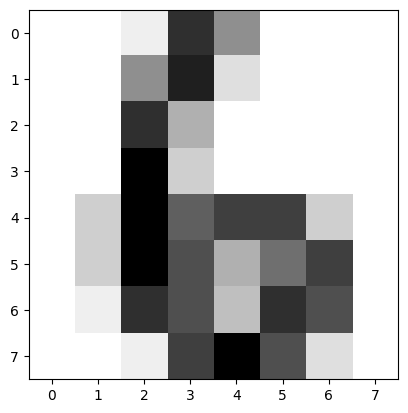

(1300, 64) (1300,)


In [ ]:
from sklearn.datasets import load_digits

#Loading
mnist=load_digits()
X, y = mnist["data"], mnist["target"]
print(X.shape,y.shape)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[360]
some_digit_image = some_digit.reshape(8,8)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.show()
y[360]
X_train, X_test, y_train, y_test = X[:1300], X[1300:], y[:1300], y[1300:]
print(X_train.shape,y_train.shape)

from sklearn.linear_model import SGDClassifier
# True for all 6s, False for all other digits.
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_6)
sgd_clf.predict([some_digit])

from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_6, cv=3, scoring="accuracy")

array([0.99308756, 0.98152425, 0.98383372])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)
for train_index, test_index in skfolds.split(X_train, y_train_6):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_6[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_6[test_index]
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.9930875576036866
0.9815242494226328
0.9838337182448037


# Is Accuracy a good Measure ?

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
X, y = make_classification(n_samples=100, n_features=10, random_state=42)
logistic_clf = LogisticRegression()
# Evaluate using accuracy, precision, and recall
accuracy = cross_val_score(logistic_clf, X, y, cv=3, scoring="accuracy")
precision = cross_val_score(logistic_clf, X, y, cv=3, scoring="precision")
recall = cross_val_score(logistic_clf, X, y, cv=3, scoring="recall")
print("Accuracy scores:", accuracy)
print("Precision scores:", precision)
print("Recall scores:", recall)

Accuracy scores: [0.97058824 0.90909091 0.96969697]
Precision scores: [0.94444444 0.9375     0.94117647]
Recall scores: [1.         0.88235294 1.        ]
